In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_filtered_data.csv')


/tmp/ipython-input-1872329616.py:6: DtypeWarning: Columns (11,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_filtered_data.csv')


In [ ]:
print("Original Data Head:")
print(df.head())

Original Data Head:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... minimum nights number of reviews  \
0  40.

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(list(numerical_cols))
print("\nCategorical Columns:")
print(list(categorical_cols))

Numerical Columns:
['id', 'host id', 'lat', 'long', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'total_price']

Categorical Columns:
['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'last review', 'house_rules', 'license']


In [ ]:
# a. Clean 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if df[col].dtype == 'object':
        df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# b. Handle null values
df['reviews per month'] = df['reviews per month'].fillna(0)

# Drop rows where essential columns like 'review rate number' have nulls.
df.dropna(subset=['review rate number', 'NAME', 'host name'], inplace=True)

print("\nCleaned Data Info:")
df.info()



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 44933 entries, 0 to 45309
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44933 non-null  int64  
 1   NAME                            44933 non-null  object 
 2   host id                         44933 non-null  int64  
 3   host_identity_verified          44781 non-null  object 
 4   host name                       44933 non-null  object 
 5   neighbourhood group             44910 non-null  object 
 6   neighbourhood                   44918 non-null  object 
 7   lat                             44925 non-null  float64
 8   long                            44925 non-null  float64
 9   country                         44857 non-null  object 
 10  country code                    44883 non-null  object 
 11  instant_bookable                44883 non-null  object 
 12  cancellation_poli

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1611391767.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [ ]:
# Calculate the average price for each neighbourhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean().reset_index()

print("\nAverage Price by Neighbourhood Group:")
print(avg_price_by_neighbourhood)


Average Price by Neighbourhood Group:
  neighbourhood group       price
0               Bronx  618.362887
1            Brooklyn  618.160754
2           Manhattan  618.364712
3              Queens  618.580099
4       Staten Island  621.100295
5             brookln  580.000000



Number of Listings by Room Type:
room type
Entire home/apt    23296
Private room       20616
Shared room         1021
Name: count, dtype: int64


/tmp/ipython-input-471854673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', order=room_type_counts.index, palette='viridis')



Bar plot 'room_type_listings.png' has been generated.


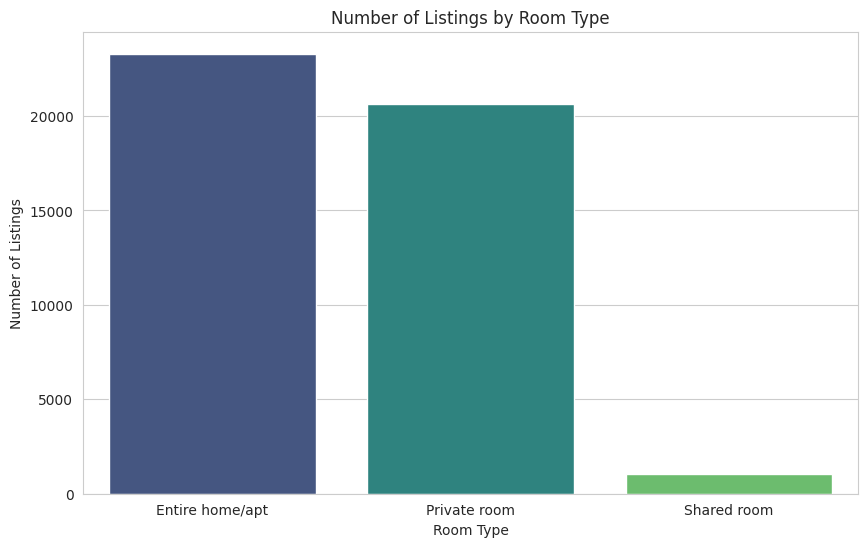

In [ ]:
# Count listings for each room type
room_type_counts = df['room type'].value_counts()
print("\nNumber of Listings by Room Type:")
print(room_type_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room type', order=room_type_counts.index, palette='viridis')
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.savefig('room_type_listings.png')
print("\nBar plot 'room_type_listings.png' has been generated.")



Histogram 'review_rate_distribution.png' has been generated.


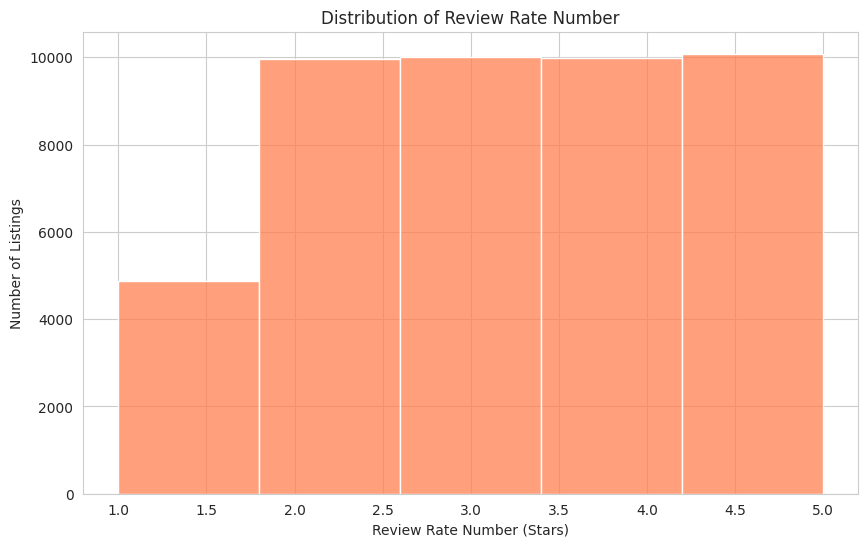

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['review rate number'], bins=5, kde=False, color='coral')
plt.title('Distribution of Review Rate Number')
plt.xlabel('Review Rate Number (Stars)')
plt.ylabel('Number of Listings')
plt.savefig('review_rate_distribution.png')
print("\nHistogram 'review_rate_distribution.png' has been generated.")

In [ ]:
# Find the host with the most listings
top_host = df['host name'].value_counts().idxmax()
top_host_listings_count = df['host name'].value_counts().max()

print(f"\nThe host with the most listings is '{top_host}' with {top_host_listings_count} listings.")


The host with the most listings is 'Michael' with 369 listings.



The correlation between 'price' and 'number of reviews' is: 0.0017

Scatter plot 'price_vs_reviews_scatter.png' has been generated.


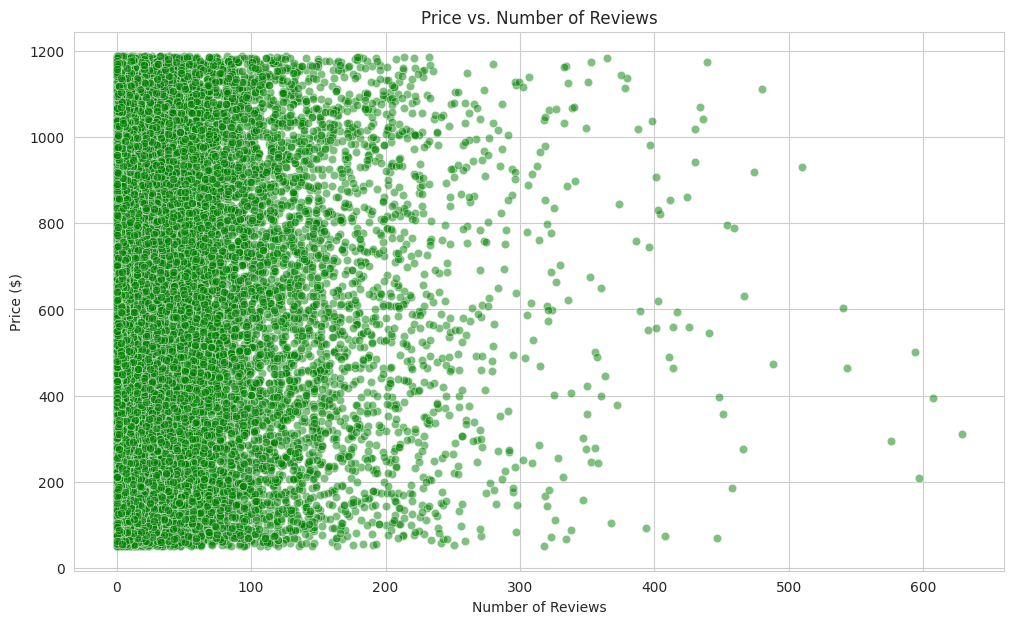

In [ ]:
# Calculate the correlation
correlation = df['price'].corr(df['number of reviews'])
print(f"\nThe correlation between 'price' and 'number of reviews' is: {correlation:.4f}")

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df[df['price'] < 3000], x='number of reviews', y='price', alpha=0.5, color='green')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.savefig('price_vs_reviews_scatter.png')
print("\nScatter plot 'price_vs_reviews_scatter.png' has been generated.")

In [ ]:
# Find the most common cancellation policy
most_common_policy = df['cancellation_policy'].mode()[0]

print(f"\nThe most common cancellation policy is: '{most_common_policy}'")



The most common cancellation policy is: 'moderate'


In [ ]:
# Find the top 3 most expensive listings
top_3_expensive = df.sort_values(by='price', ascending=False).head(3)

print("\nTop 3 Most Expensive Listings:")
print(top_3_expensive[['NAME', 'host name', 'price']])


Top 3 Most Expensive Listings:
                                                    NAME        host name  \
21563                       Cosy apartment in Park Slope          Ginevra   
28404  BEDSTUY BK - PAD\nSHORT/ LONG TERM STAYS\nNO E...             Mrs.   
11229                Your own hip and cozy 1BD apartment  Vitaly And Lena   

        price  
21563  1188.0  
28404  1188.0  
11229  1188.0  



Average Minimum Nights by Room Type:
room type
Entire home/apt    8.970972
Private room       5.777317
Shared room        6.560353
Name: minimum nights, dtype: float64


/tmp/ipython-input-1472056695.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['minimum nights'] <= 45], x='room type', y='minimum nights', palette='pastel')



Box plot 'min_nights_boxplot.png' has been generated.


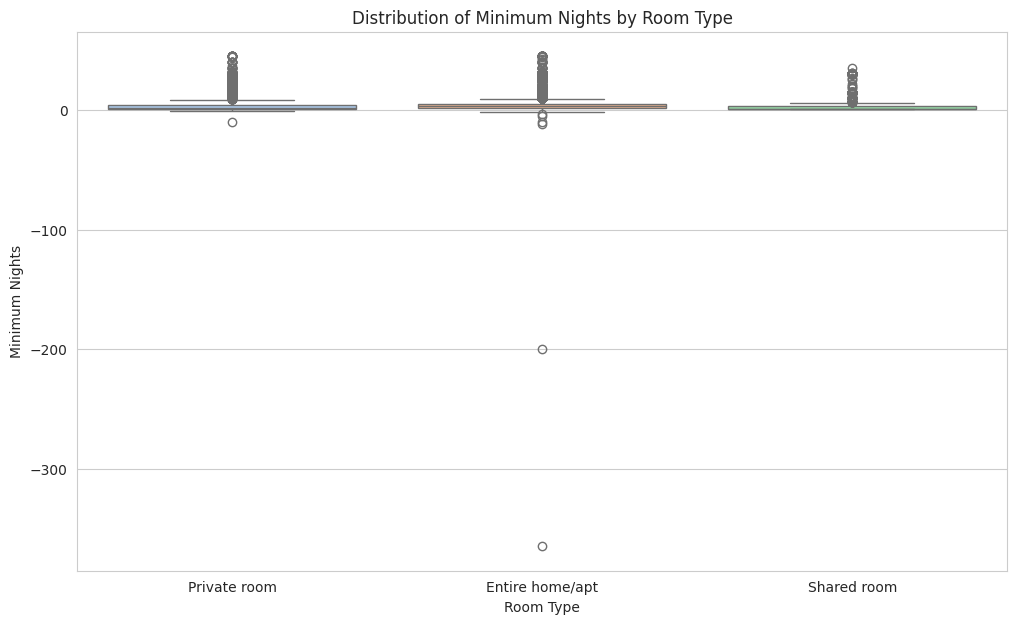

In [ ]:
# Calculate average minimum nights per room type
avg_min_nights = df.groupby('room type')['minimum nights'].mean()
print("\nAverage Minimum Nights by Room Type:")
print(avg_min_nights)

plt.figure(figsize=(12, 7))
sns.boxplot(data=df[df['minimum nights'] <= 45], x='room type', y='minimum nights', palette='pastel')
plt.title('Distribution of Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.savefig('min_nights_boxplot.png')
print("\nBox plot 'min_nights_boxplot.png' has been generated.")